In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

#### Check Faker

In [1]:
from faker import Faker

In [4]:
fake = Faker()


#### Load data

In [82]:
df = pd.read_csv('../data/raw/heart.csv') 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [85]:
# change column names
new_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

#cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

target = 'target'

In [86]:
list(zip(df.columns, new_cols))

[('age', 'age'),
 ('sex', 'sex'),
 ('cp', 'chest_pain_type'),
 ('trestbps', 'resting_blood_pressure'),
 ('chol', 'cholesterol'),
 ('fbs', 'fasting_blood_sugar'),
 ('restecg', 'rest_ecg'),
 ('thalach', 'max_heart_rate_achieved'),
 ('exang', 'exercise_induced_angina'),
 ('oldpeak', 'st_depression'),
 ('slope', 'st_slope'),
 ('ca', 'num_major_vessels'),
 ('thal', 'thalassemia'),
 ('target', 'target')]

In [114]:
df[cat_cols].columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [115]:
df.columns[(~df.columns.isin(cat_cols)) & (df.columns != target)]

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')

In [87]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

#### EDA

In [88]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

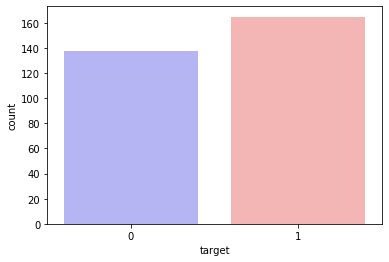

In [89]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

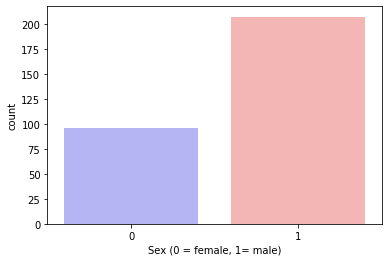

In [90]:
sns.countplot(x="sex", data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [91]:
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

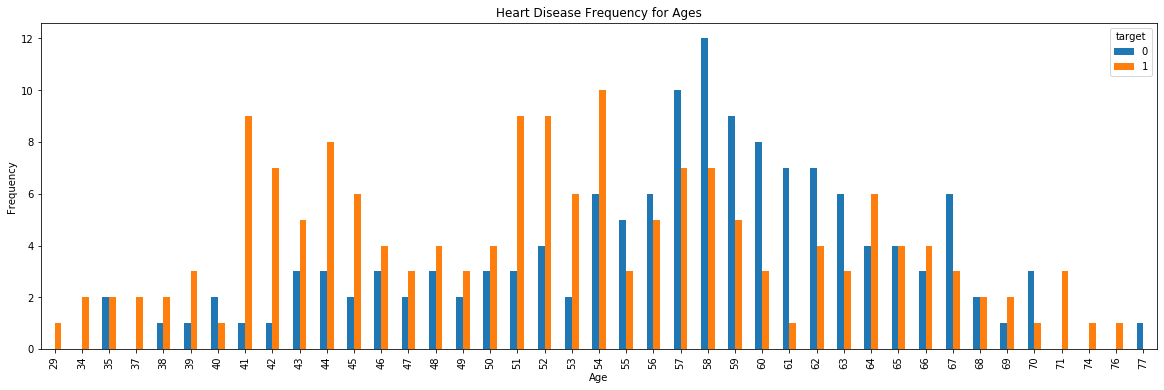

In [92]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

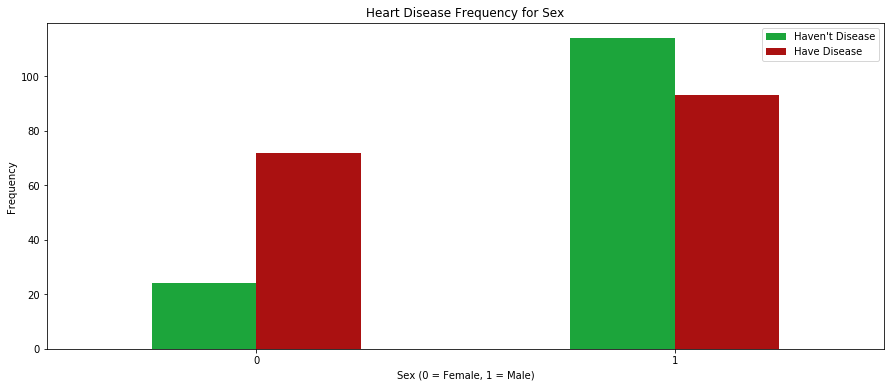

In [93]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

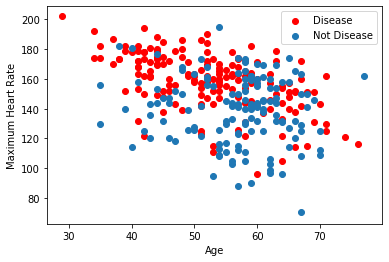

In [94]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

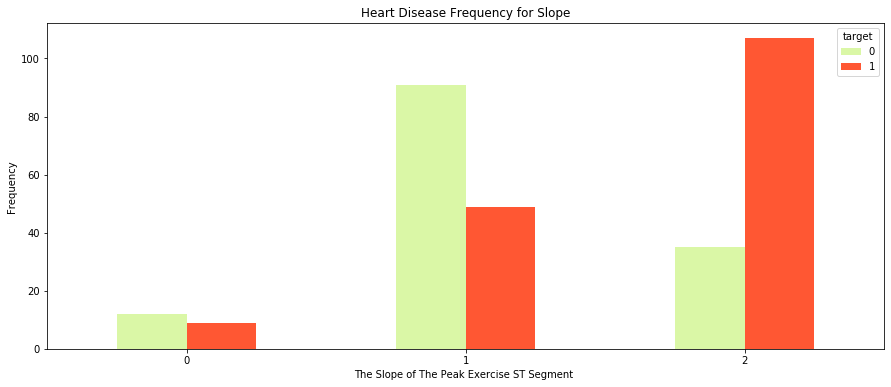

In [95]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

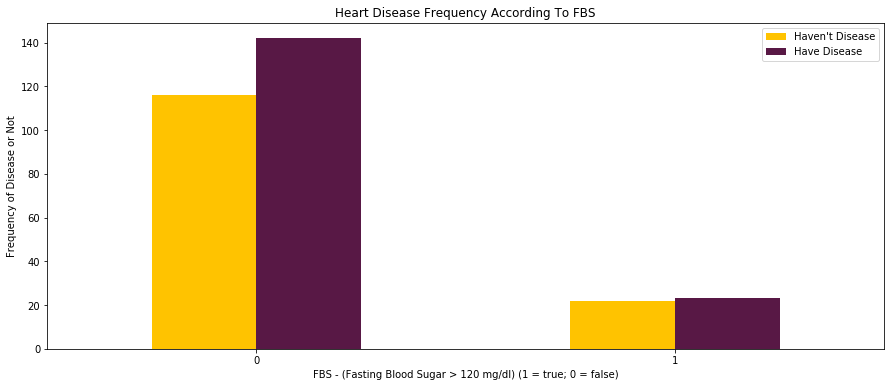

In [96]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

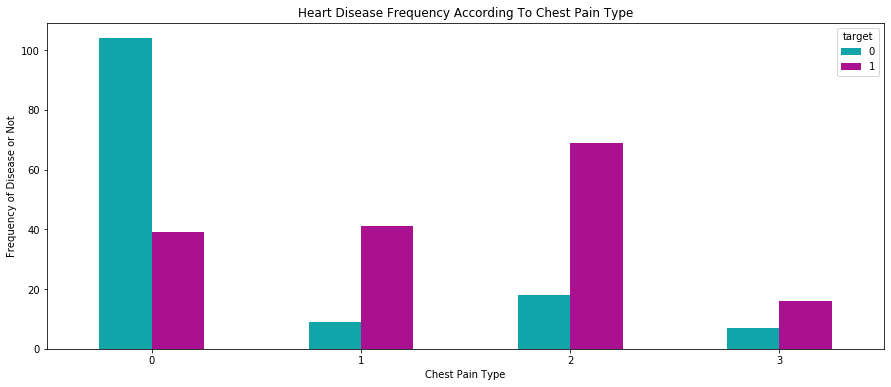

In [97]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

#### Check Pipelines, ColumnTransformer

In [98]:
ohedf = categorical_pipeline.fit_transform(df).toarray()
ohedf.shape

(303, 400)

In [99]:
dumdf = pd.get_dummies(df, drop_first=True)
dumdf.shape

(303, 14)

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


categorical_pipeline = Pipeline(
        [
            ('ohe', OneHotEncoder())
        ]
    )

numerical_pipeline = Pipeline(
        [
            ('scaler', StandardScaler())
        ]
    )

df.shape

(303, 14)

In [101]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [102]:
# normalize num cols and ohe cat cols
transformer = ColumnTransformer(
    [
        (
            'categorical_pipeline',
            categorical_pipeline,
            cat_cols,
        ), 
        (
            'numerical_pipeline',
            numerical_pipeline,
            df.columns[(~df.columns.isin(cat_cols)) & (df.columns != target)],
        )
    ]
)

In [103]:
df[cat_cols] = df[cat_cols].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null object
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null object
ca          303 non-null int64
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


In [104]:
catdf = categorical_pipeline.fit_transform(df[cat_cols]).toarray()
print(catdf.shape)
catdf

(303, 20)


array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [105]:
print(df.columns[(~df.columns.isin(cat_cols)) & (df.columns != target)])
numdf = numerical_pipeline.fit_transform(df[df.columns[(~df.columns.isin(cat_cols)) & (df.columns != target)]])
print(numdf.shape)
numdf

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')
(303, 6)


array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806,
        -0.71442887],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273,
        -0.71442887],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206,
        -0.71442887],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317,
         1.24459328],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295,
         0.26508221],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172,
         0.26508221]])

In [106]:
transdf = pd.DataFrame(transformer.fit_transform(df))
print(transdf.shape)
transdf.head()

(303, 26)


0    1    2    3    4    5    6    7    8    9   ...   16   17   18   19  \
0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0   
2  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
3  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0   
4  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0   

         20        21        22        23        24        25  
0  0.952197  0.763956 -0.256334  0.015443  1.087338 -0.714429  
1 -1.915313 -0.092738  0.072199  1.633471  2.122573 -0.714429  
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912 -0.714429  
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705 -0.714429  
4  0.290464 -0.663867  2.082050  0.583939 -0.379244 -0.714429  

[5 rows x 26 columns]

#### Prototype model

In [108]:
# # rename categorical vars
# df[df['sex'] == 0].loc[:, 'sex'] = 'female'
# df[df['sex'] == 1].loc[:, 'sex'] = 'male'

# df[df['chest_pain_type'] == 1].loc[:, 'chest_pain_type'] = 'typical angina'
# df[df['chest_pain_type'] == 2].loc[:, 'chest_pain_type'] = 'atypical angina'
# df[df['chest_pain_type'] == 3].loc[:, 'chest_pain_type'] = 'non-anginal pain'
# df[df['chest_pain_type'] == 4].loc[:, 'chest_pain_type'] = 'asymptomatic'

# df[df['fasting_blood_sugar'] == 0].loc[:, 'fasting_blood_sugar'] = 'lower than 120mg/ml'
# df[df['fasting_blood_sugar'] == 1].loc[:, 'fasting_blood_sugar'] = 'greater than 120mg/ml'

# df[df['rest_ecg'] == 0].loc[:, 'rest_ecg'] = 'normal'
# df[df['rest_ecg'] == 1].loc[:, 'rest_ecg'] = 'ST-T wave abnormality'
# df[df['rest_ecg'] == 2].loc[:, 'rest_ecg'] = 'left ventricular hypertrophy'

# df[df['exercise_induced_angina'] == 0].loc[:, 'exercise_induced_angina'] = 'no'
# df[df['exercise_induced_angina'] == 1].loc[:, 'exercise_induced_angina'] = 'yes'

# df[df['st_slope'] == 1].loc[:, 'st_slope'] = 'upsloping'
# df[df['st_slope'] == 2].loc[:, 'st_slope'] = 'flat'
# df[df['st_slope'] == 3].loc[:, 'st_slope'] = 'downsloping'

# df[df['thalassemia'] == 1].loc[:, 'thalassemia'] = 'normal'
# df[df['thalassemia'] == 2].loc[:, 'thalassemia'] = 'fixed defect'
# df[df['thalassemia'] == 3].loc[:, 'thalassemia'] = 'reversable defect'
# df.head()

In [109]:
# # change datatypes to categorical vars to object
# df['sex'] = df['sex'].astype('object')
# df['chest_pain_type'] = df['chest_pain_type'].astype('object')
# df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
# df['rest_ecg'] = df['rest_ecg'].astype('object')
# df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
# df['st_slope'] = df['st_slope'].astype('object')
# df['thalassemia'] = df['thalassemia'].astype('object')
# df.head()

In [110]:
# dumdf = pd.get_dummies(df, drop_first=True)
# print(dumdf.shape)
# dumdf.head()

#### Train model

In [111]:
# create model
xtrain, xtest, ytrain, ytest = train_test_split(transdf,
                                                df['target'], 
                                                random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((227, 26), (76, 26), (227,), (76,))

In [112]:
# fit model
model = RandomForestClassifier(max_depth=5)
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
# validate model
preds = model.predict(xtest)
confusion_matrix(preds, ytest.squeeze()), f1_score(preds, ytest.squeeze())

(array([[28,  4],
        [ 7, 37]]), 0.8705882352941177)